In [49]:
from yahoo_fin import options

In [50]:
from datetime import datetime, timedelta

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

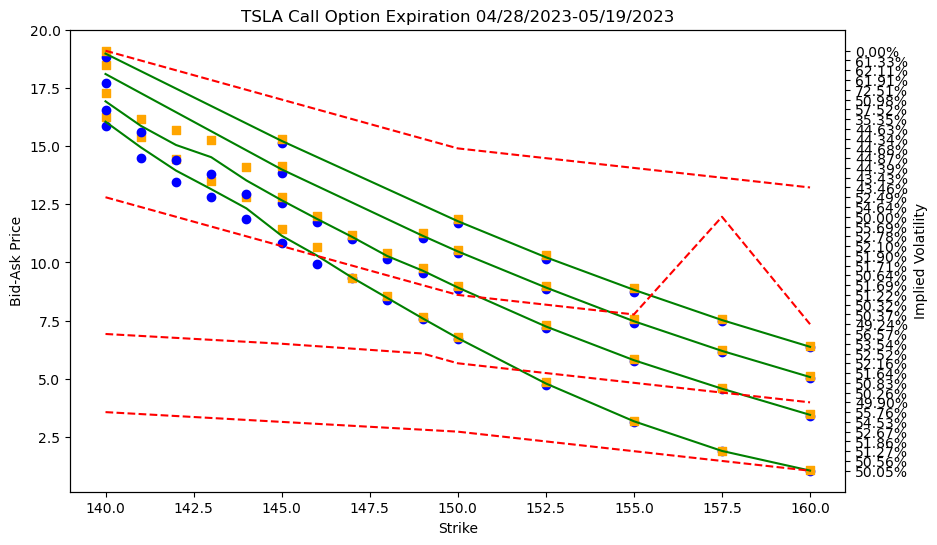

In [52]:
def get_option_data(ticker, expiry_date, strike_min = 140, strike_max = 160):
    df = options.get_calls(ticker, expiry_date)
    
    df = df[(df['Strike']>=strike_min) & (df['Strike']<=strike_max)]
    
    strike = df['Strike']
    bid = df['Bid']
    ask = df['Ask']
    last_price = (df['Bid'] + df['Ask'])/2
    iv = df['Implied Volatility']
    
    return strike, bid, ask, last_price, iv

ticker = 'TSLA'

start_date = datetime.strptime('04/28/2023', '%m/%d/%Y')
expiry_dates = [start_date + timedelta(days=i) for i in range(28) if i%7==0]

fig, ax = plt.subplots(figsize=(10,6))
ax2 = ax.twinx()

for i, expiry_date in enumerate(expiry_dates):
    strike, bid, ask, last_price, iv = get_option_data(ticker, expiry_date.strftime('%m-%d-%Y'))
    ax.scatter(strike, bid, label = 'Bid', marker = 'o', color = 'blue')
    ax.scatter(strike, ask, label = 'Ask', marker = 's', color = 'orange')
    ax.plot(strike, last_price, color = 'green', label = 'Last Price' if i==0 else '')
    ax2.plot(strike, iv, '--', color = 'red', label = 'Implied Volatility' if i==0 else '')

ax.set_title(f'{ticker} Call Option Expiration {expiry_dates[0].strftime("%m/%d/%Y")}-{expiry_dates[-1].strftime("%m/%d/%Y")}')
ax.set_xlabel('Strike')
ax.set_ylabel('Bid-Ask Price')
ax2.set_ylabel('Implied Volatility')
ax2.invert_yaxis()
ax2.tick_params(axis='y', labelsize=10)

plt.show()

## Note: Tesla current price at 155, seeing a spike in 5.5.2023 option IV at call option price = $7.5. The price interval between 5.12.2023 option and 5.5.2023 option is also greater than that of 5.12.2023 ~5.19.2023, does that implying a good sell opportunity?

In [54]:
from yahoo_fin import stock_info as si

In [55]:
import plotly.graph_objects as go

In [56]:
def candlestick(tickerSymbol, start_date, end_date, shift):
    
    tickerData = si.get_data(tickerSymbol, start_date=start_date, end_date=end_date)
    tickerData['price_change'] = tickerData['adjclose']/tickerData['adjclose'].shift(shift)-1
    
    fig = go.Figure(data=[go.Candlestick(x=tickerData.index, open=tickerData['open'], high=tickerData['high'], low=tickerData['low'], close=tickerData['adjclose'])])
    fig.update_layout(title ='{} price history {}-{}'.format(tickerSymbol.upper(), start_date, end_date))

    fig.show()

In [61]:
candlestick('tsla', '2022-04-24', '2023-04-24', 4)

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
def plot_price_change(tickerSymbol, start_date, end_date, change, shift):
    # Get the data for the ticker from the start date to the end date
    tickerData = si.get_data(tickerSymbol, start_date=start_date, end_date=end_date)

    # Calculate the x-day price change
    price_change = tickerData['adjclose'] / tickerData['adjclose'].shift(shift) - 1
    price_change = price_change.dropna()

    # Calculate the percentage of price changes greater than the specified value
    pct_gt_change = (price_change > change).sum() / price_change.size * 100

    # Create a histogram of the price change
    sns.histplot(price_change, kde=True, stat='density', bins=20)
    plt.xlabel('{}-day price change'.format(shift))
    plt.ylabel('Density')
    plt.title('Distribution of {}-day Price Change for {} \nPercentage of price changes > {:.2f}: {:.2f}%'.format(shift, tickerSymbol.upper(), change, pct_gt_change))
    plt.show()

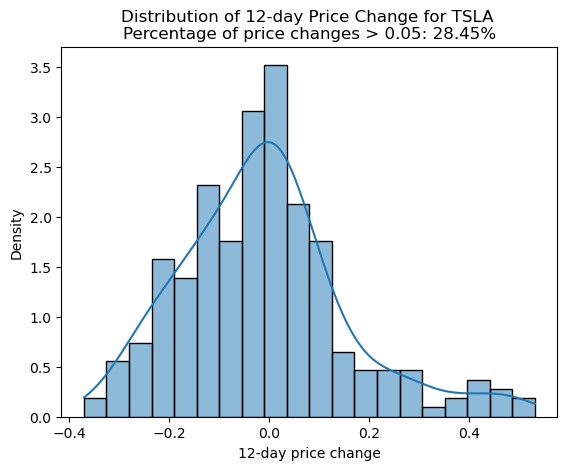

In [62]:
plot_price_change('tsla', '2022-04-19', '2023-04-19', 0.05, 12)

## Assuming selling a tesla call with expiry date of 5.12.2023 at 7.5 at current price (155), the probability of a profit at expiry date (if the price is less than 162.5 is 28.45%, there is a 62.55% to make a profit in this trade.